## Projeto Final de Aprendizagem de Máquina

### Objetivo
Este projeto tem como objetivo aplicar os conceitos de Aprendizagem de Máquina (AM) abordados durante a cadeira a problemas práticos enfrentados pela sociedade. Utilizaremos um dataset com aplicabilidade prática relevante para implementar diferentes modelos de AM e comparar seus desempenhos.

### Metodologia
Neste projeto, implementaremos os seguintes modelos de Aprendizagem de Máquina:
- Support Vector Machine (SVM)
- Redes Neurais
- Árvores de Decisão

Cada modelo será treinado utilizando o mesmo conjunto de dados e avaliado com métricas adequadas para comparação de desempenho.

### Estrutura do Projeto
Este notebook foca especificamente na implementação do modelo de Redes Neurais. A análise exploratória dos dados (EDA) e pré-processamento foram realizados em um notebook separado.

1. Carregamento dos dados pré-processados
2. Implementação do modelo de Redes Neurais
3. Treinamento do modelo
4. Avaliação do desempenho
5. Análise dos resultados

Os demais modelos (SVM e Árvores de Decisão) serão implementados em notebooks complementares para posterior comparação de resultados.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input

from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    accuracy_score,
    precision_score, 
    recall_score, 
    f1_score
)


c:\Users\carlo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\carlo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\carlo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [2]:
df = pd.read_csv("../data/Student_Depression_Cleaned.csv")

df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Family History of Mental Illness,Depression,Weighted Stress,Academic_Financial_Interaction,Mental_Vulnerability_Score,Depression_Predisposition_Score,Extreme_Mental_Crisis,Ultimate_Depression_Predictor,Mental_Health_Crisis_Index,Stress_Vulnerability_Multiplier
0,1,1,2.0,5.90,5.0,2,2,2,0,3.0,...,1,0,2.0,4.0,0.395,0.24875,0,0.3,2,1.4
1,1,2,3.0,5.59,2.0,3,2,2,1,4.0,...,1,1,3.8,15.0,0.870,0.71750,1,0.5,7,4.0
2,1,2,4.0,8.13,3.0,2,2,3,1,1.0,...,0,0,2.8,4.0,0.655,0.86375,1,0.5,4,2.0
3,2,2,2.0,5.70,3.0,1,3,6,0,4.0,...,0,0,1.6,2.0,0.200,0.15000,0,0.0,1,0.6
4,2,2,3.0,9.54,4.0,3,3,2,0,1.0,...,0,0,2.6,6.0,0.210,0.05250,0,0.0,0,0.5


In [3]:
df.shape

(21742, 21)

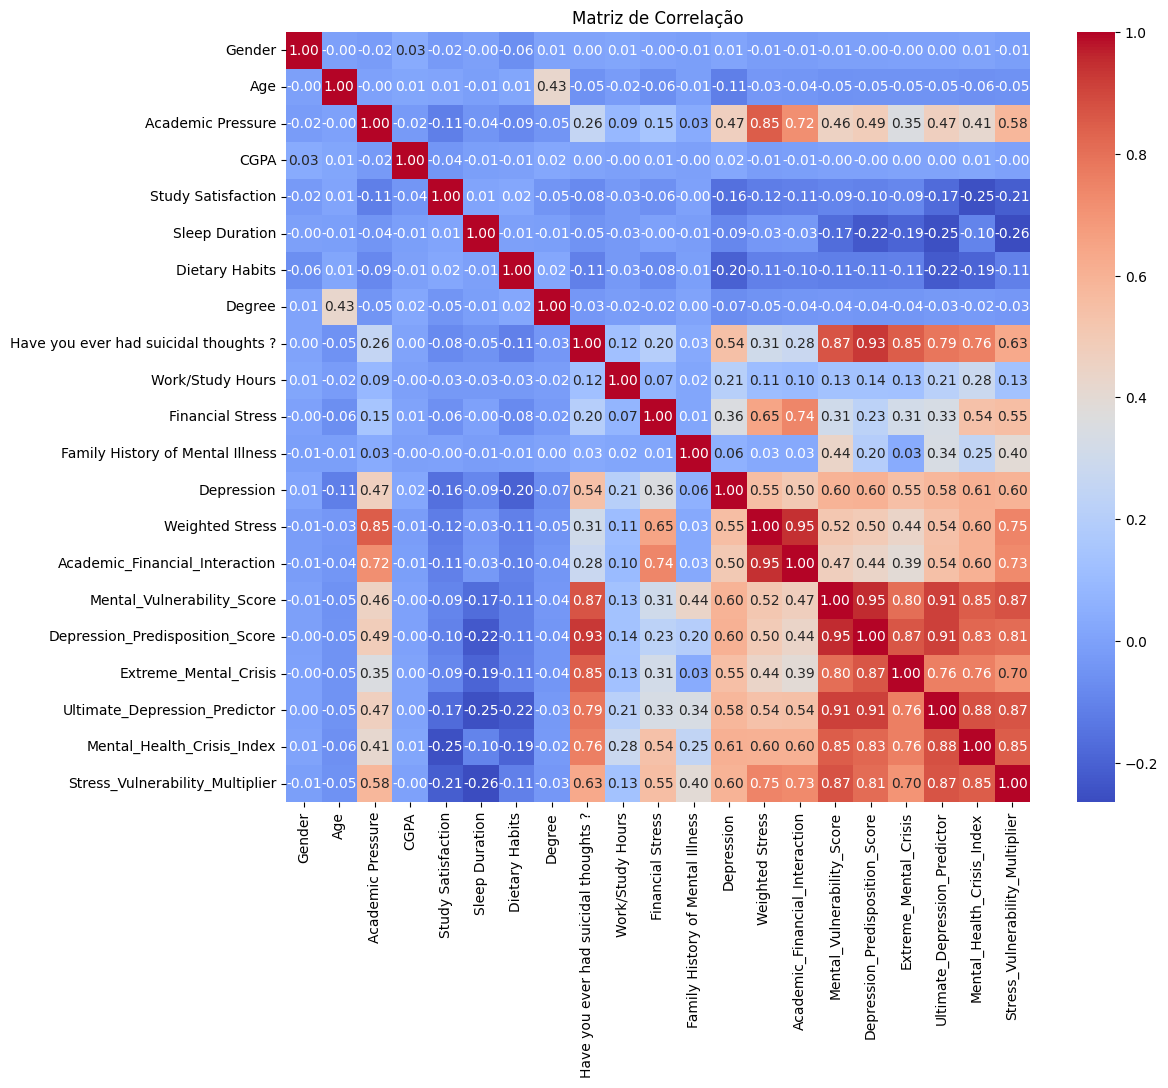

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Matriz de Correlação')
plt.show()

In [5]:
features = [
    'Academic Pressure', 'Have you ever had suicidal thoughts ?','Weighted Stress',
    'Financial Stress','Academic_Financial_Interaction','Extreme_Mental_Crisis',
    'Depression_Predisposition_Score','Mental_Vulnerability_Score','Mental_Health_Crisis_Index','Stress_Vulnerability_Multiplier',
    'Ultimate_Depression_Predictor'
]
df_feature = df[features]

df_feature.head()

,Academic Pressure,Have you ever had suicidal thoughts ?,Weighted Stress,Financial Stress,Academic_Financial_Interaction,Extreme_Mental_Crisis,Depression_Predisposition_Score,Mental_Vulnerability_Score,Mental_Health_Crisis_Index,Stress_Vulnerability_Multiplier,Ultimate_Depression_Predictor
0,2.0,0,2.0,2.0,4.0,0,0.24875,0.395,2,1.4,0.3
1,3.0,1,3.8,5.0,15.0,1,0.71750,0.870,7,4.0,0.5
2,4.0,1,2.8,1.0,4.0,1,0.86375,0.655,4,2.0,0.5
3,2.0,0,1.6,1.0,2.0,0,0.15000,0.200,1,0.6,0.0
4,3.0,0,2.6,2.0,6.0,0,0.05250,0.210,0,0.5,0.0


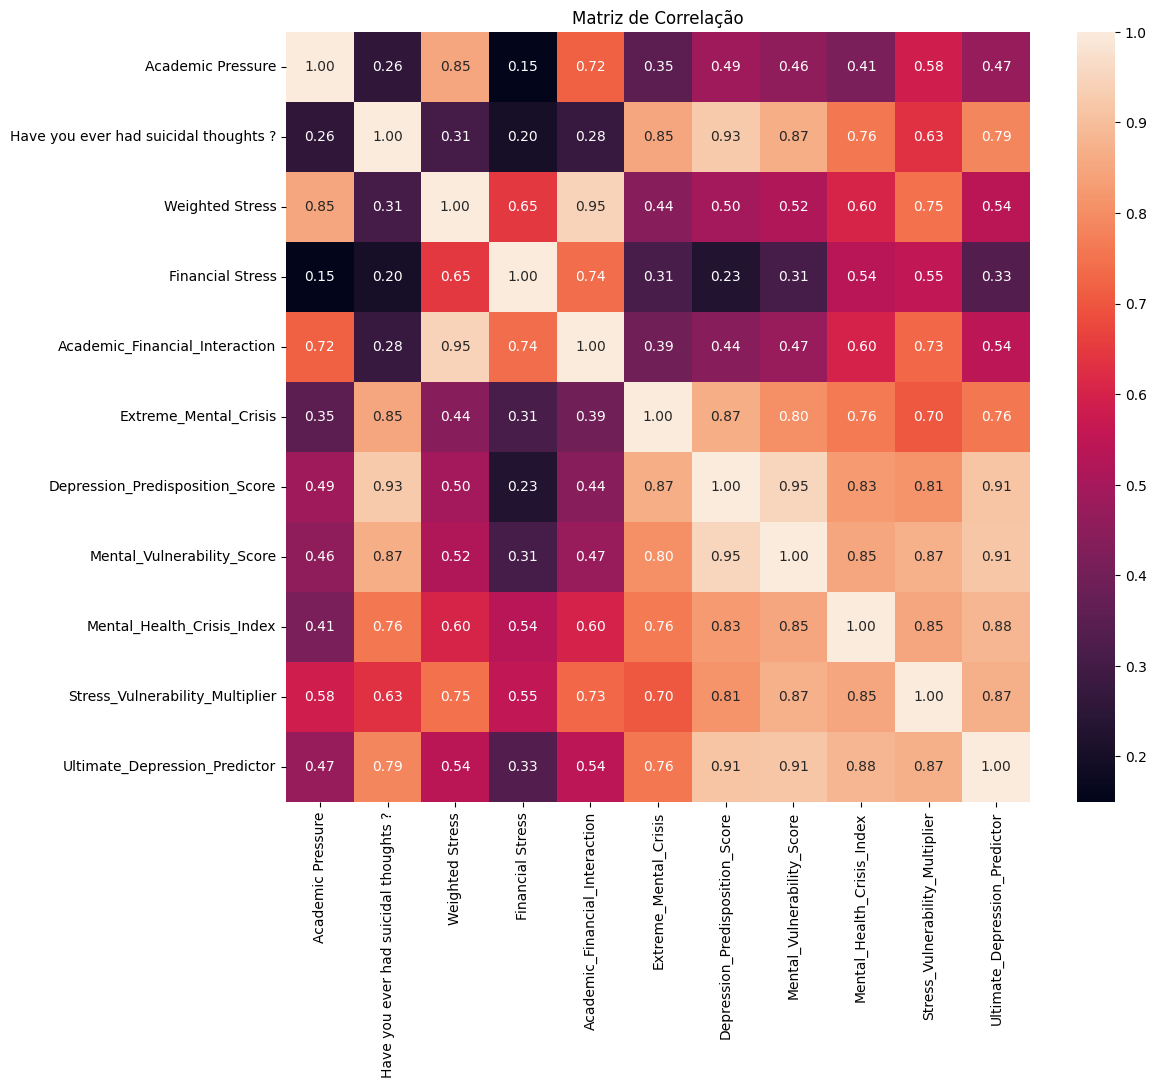

In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_feature.corr(), annot=True, fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [7]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Academic Pressure                      21742 non-null  float64
 1   Have you ever had suicidal thoughts ?  21742 non-null  int64  
 2   Weighted Stress                        21742 non-null  float64
 3   Financial Stress                       21742 non-null  float64
 4   Academic_Financial_Interaction         21742 non-null  float64
 5   Extreme_Mental_Crisis                  21742 non-null  int64  
 6   Depression_Predisposition_Score        21742 non-null  float64
 7   Mental_Vulnerability_Score             21742 non-null  float64
 8   Mental_Health_Crisis_Index             21742 non-null  int64  
 9   Stress_Vulnerability_Multiplier        21742 non-null  float64
 10  Ultimate_Depression_Predictor          21742 non-null  float64
dtypes:

In [8]:
print("\nDistribuição da variável target (Depression):")
print(df['Depression'].value_counts())


Distribuição da variável target (Depression):
Depression
1    13807
0     7935
Name: count, dtype: int64


In [9]:
print("\nPercentual por classe:")
print(df['Depression'].value_counts(normalize=True) * 100)


Percentual por classe:
Depression
1    63.503817
0    36.496183
Name: proportion, dtype: float64


In [10]:
BATCH_SIZE = 128
RANDOM_STATE = 42

X = df[features[:-1]]  # Todas as features exceto 'Depression'
y = df['Depression']   # Target


In [11]:

print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")

Shape de X: (21742, 10)
Shape de y: (21742,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = X_train_scaled
X_test = X_test_scaled


print("\nDivisão dos dados:\n")
print(f"Treino: \nX={X_train.shape}, y={y_train.shape}")
print(f"\nTeste: \nX={X_test.shape}, y={y_test.shape}")


Divisão dos dados:

Treino: 
X=(17393, 10), y=(17393,)

Teste: 
X=(4349, 10), y=(4349,)


In [13]:
model = Sequential()

model.add(Input(shape=(10,)))

model.add(Dense(60, kernel_initializer='normal', activation='tanh')) 
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))


In [14]:
initial_weights = model.get_weights()

sgd = keras.optimizers.SGD(learning_rate=0.01)

model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 60)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 721 (2.82 KB)

 Trainable params: 721 (2.82 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.set_weights(initial_weights)
history = model.fit(X_train, y_train, epochs=100, batch_size=BATCH_SIZE)

# Fazendo predições no conjunto de teste
y_test_pred_proba = model.predict(X_test)
y_test_pred_binary = (y_test_pred_proba > 0.5).astype(int).flatten()

Epoch 1/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7875 - loss: 0.5990  
Epoch 2/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8184 - loss: 0.4607
Epoch 3/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8217 - loss: 0.4135  
Epoch 4/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8246 - loss: 0.3987
Epoch 5/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8279 - loss: 0.3920
Epoch 6/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8297 - loss: 0.3883
Epoch 7/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8309 - loss: 0.3861
Epoch 8/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8323 - loss: 0.3847
Epoch 9/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8334 - loss: 0.3837  
Epoch 10/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8335 - loss: 0.3831
Epoch 11/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8334 - loss: 0.3827  
Epoch 12/100
136/136 ━━━━━━━━━━━━

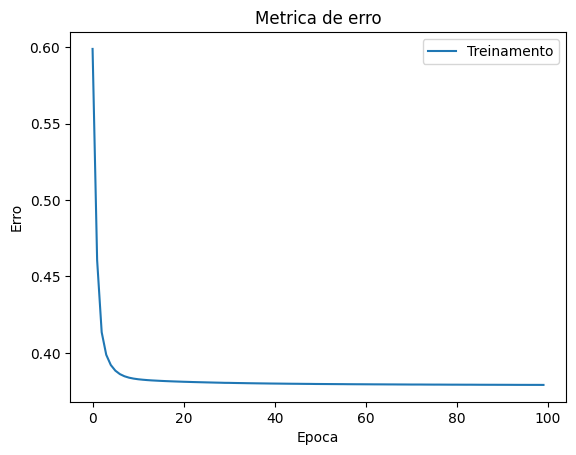

In [16]:
plt.plot(history.history['loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

In [17]:
# Primeiro adicione o import necessário se ainda não tiver
from sklearn.metrics import roc_auc_score

# Avaliação final do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test, 
                                         batch_size=BATCH_SIZE, verbose=0)

print("\n=== RESULTADO FINAL DA REDE NEURAL ===")
print(f"   Acurácia no conjunto de TESTE: {test_accuracy:.4f}")
print(f"   Loss no conjunto de teste: {test_loss:.4f}")



# Calculando métricas detalhadas
test_precision = precision_score(y_test, y_test_pred_binary)
test_recall = recall_score(y_test, y_test_pred_binary)
test_f1 = f1_score(y_test, y_test_pred_binary)
test_auc = roc_auc_score(y_test, y_test_pred_proba.flatten())

print(f"   Precisão: {test_precision:.4f}")
print(f"   Recall: {test_recall:.4f}") 
print(f"   F1-Score: {test_f1:.4f}")
print(f"   AUC-ROC: {test_auc:.4f}")

# CLASSIFICATION REPORT - O que você queria
print("\n=== RELATÓRIO DETALHADO DE CLASSIFICAÇÃO ===")
print(classification_report(y_test, y_test_pred_binary, 
                          target_names=['Sem Depressão', 'Com Depressão']))




# Armazenando resultados para comparação posterior
keras_test_accuracy = test_accuracy
keras_test_precision = test_precision
keras_test_recall = test_recall
keras_test_f1 = test_f1
keras_test_auc = test_auc


=== RESULTADO FINAL DA REDE NEURAL ===
   Acurácia no conjunto de TESTE: 0.8407
   Loss no conjunto de teste: 0.3688
   Precisão: 0.8544
   Recall: 0.9030
   F1-Score: 0.8780
   AUC-ROC: 0.9055

=== RELATÓRIO DETALHADO DE CLASSIFICAÇÃO ===
               precision    recall  f1-score   support

Sem Depressão       0.81      0.73      0.77      1587
Com Depressão       0.85      0.90      0.88      2762

     accuracy                           0.84      4349
    macro avg       0.83      0.82      0.82      4349
 weighted avg       0.84      0.84      0.84      4349



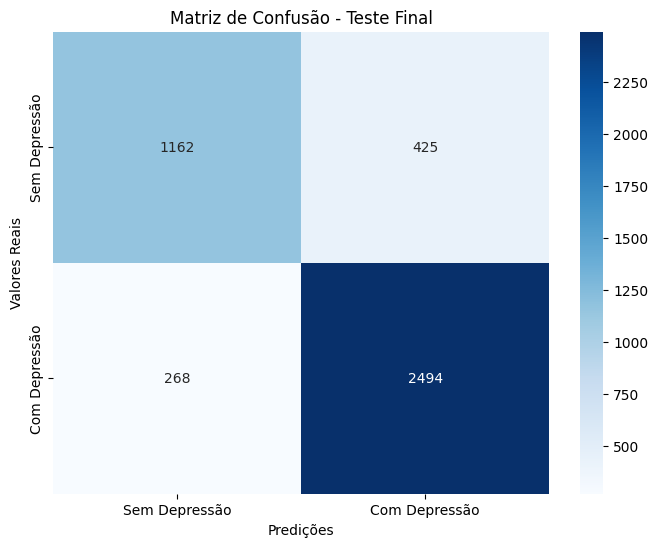

In [18]:
cm = confusion_matrix(y_test, y_test_pred_binary)


# Visualização da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Sem Depressão', 'Com Depressão'],
            yticklabels=['Sem Depressão', 'Com Depressão'])
plt.title('Matriz de Confusão - Teste Final')
plt.ylabel('Valores Reais')
plt.xlabel('Predições')
plt.show()

### Overfitt

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn import model_selection

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, random_state=RANDOM_STATE, test_size=0.2)

# Criando a arquitetura da rede neural
model = Sequential()

# Camada de entrada
model.add(Input(shape=(10,)))
model.add(Dense(30, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(15, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(7, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(1, kernel_initializer='glorot_normal', activation='sigmoid'))

# Obtém os pesos iniciais da rede
initial_weights = model.get_weights()

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 915 (3.57 KB)

 Trainable params: 915 (3.57 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.set_weights(initial_weights)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=BATCH_SIZE)

# Fazendo predições no conjunto de teste
y_test_pred_proba = model.predict(X_test)
y_test_pred_binary = (y_test_pred_proba > 0.5).astype(int).flatten()

Epoch 1/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7908 - loss: 0.4640 - val_accuracy: 0.8290 - val_loss: 0.3875
Epoch 2/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8289 - loss: 0.3933 - val_accuracy: 0.8353 - val_loss: 0.3804
Epoch 3/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8340 - loss: 0.3876 - val_accuracy: 0.8336 - val_loss: 0.3784
Epoch 4/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8341 - loss: 0.3850 - val_accuracy: 0.8382 - val_loss: 0.3756
Epoch 5/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8343 - loss: 0.3837 - val_accuracy: 0.8390 - val_loss: 0.3746
Epoch 6/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8364 - loss: 0.3822 - val_accuracy: 0.8387 - val_loss: 0.3737
Epoch 7/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8361 - loss: 0.3812 - val_accuracy: 0.8385 - val_loss: 0.3732
Epoch 8/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8364 - loss: 0.3804 - val_accu

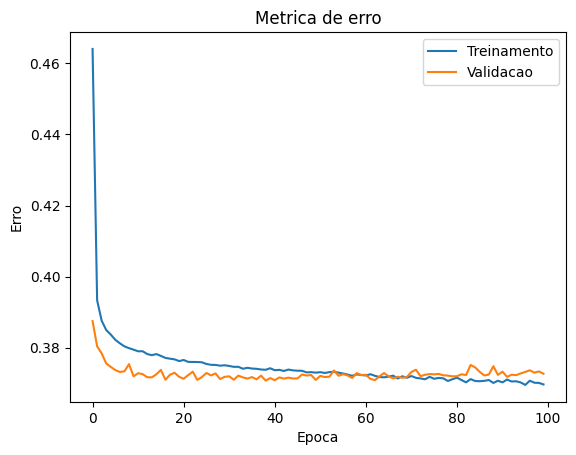

--> E_val - E_in = 0.0047
--> Acuracia (treino): 0.8404
--> Acuracia (validacao): 0.8399
--> acc_train - acc_test = 0.0006


In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

# Obtendo a acuracia no conjunto de treinamento
E_in, acc_train = model.evaluate(X_train, y_train, verbose=0)

# Obtendo a acuracia no conjunto de validacao
E_val, acc_val = model.evaluate(X_val, y_val, verbose=0)

print(f"--> E_val - E_in = {E_val - E_in:.4f}")
print(f'--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_test = {acc_train - acc_val:.4f}")

In [22]:
# Primeiro adicione o import necessário se ainda não tiver
from sklearn.metrics import roc_auc_score

# Avaliação final do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test, 
                                         batch_size=BATCH_SIZE, verbose=0)

print("\n=== RESULTADO FINAL DA REDE NEURAL ===")
print(f"   Acurácia no conjunto de TESTE: {test_accuracy:.2f}")



print("\n=== RELATÓRIO DETALHADO DE CLASSIFICAÇÃO ===")
print(classification_report(y_test, y_test_pred_binary, 
                          target_names=['Sem Depressão', 'Com Depressão']))



=== RESULTADO FINAL DA REDE NEURAL ===
   Acurácia no conjunto de TESTE: 0.84

=== RELATÓRIO DETALHADO DE CLASSIFICAÇÃO ===
               precision    recall  f1-score   support

Sem Depressão       0.81      0.74      0.78      1587
Com Depressão       0.86      0.90      0.88      2762

     accuracy                           0.84      4349
    macro avg       0.84      0.82      0.83      4349
 weighted avg       0.84      0.84      0.84      4349



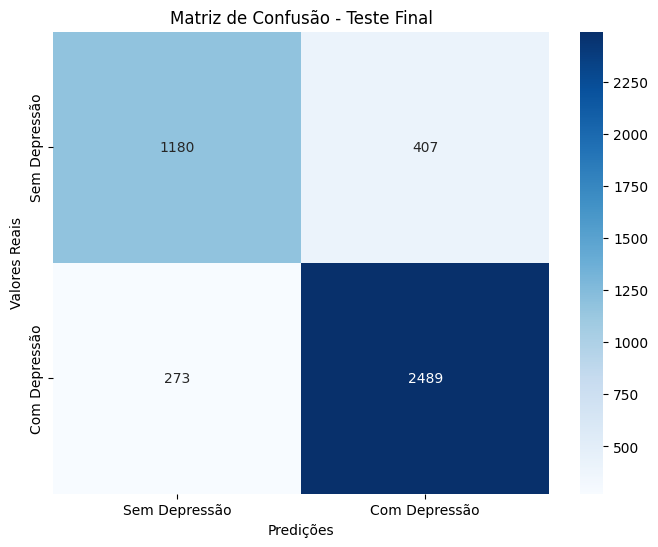

In [23]:
cm = confusion_matrix(y_test, y_test_pred_binary)


# Visualização da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Sem Depressão', 'Com Depressão'],
            yticklabels=['Sem Depressão', 'Com Depressão'])
plt.title('Matriz de Confusão - Teste Final')
plt.ylabel('Valores Reais')
plt.xlabel('Predições')
plt.show()

In [24]:
from keras.layers import Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

# Criando a arquitetura da rede neural
model = Sequential()

model.add(Input(shape=(10,)))
model.add(Dense(50, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dense(25, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dense(1, kernel_initializer='glorot_normal', activation='sigmoid'))

# Obtém os pesos iniciais da rede
initial_weights = model.get_weights()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 50)             │           550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,851 (7.23 KB)

 Trainable params: 1,851 (7.23 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.set_weights(initial_weights)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=BATCH_SIZE)

y_test_pred_proba = model.predict(X_test)
y_test_pred_binary = (y_test_pred_proba > 0.5).astype(int).flatten()

Epoch 1/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8067 - loss: 1.7291 - val_accuracy: 0.8413 - val_loss: 1.4384
Epoch 2/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8333 - loss: 1.2622 - val_accuracy: 0.8382 - val_loss: 1.0852
Epoch 3/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8323 - loss: 0.9726 - val_accuracy: 0.8376 - val_loss: 0.8515
Epoch 4/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8343 - loss: 0.7828 - val_accuracy: 0.8367 - val_loss: 0.7021
Epoch 5/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8329 - loss: 0.6569 - val_accuracy: 0.8370 - val_loss: 0.5986
Epoch 6/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8338 - loss: 0.5724 - val_accuracy: 0.8393 - val_loss: 0.5293
Epoch 7/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8347 - loss: 0.5152 - val_accuracy: 0.8382 - val_loss: 0.4839
Epoch 8/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8348 - loss: 0.4766 - val_accu

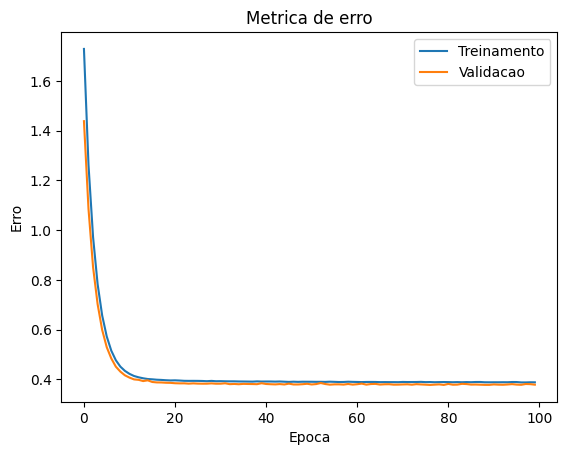

--> E_val - E_in = -0.0087
--> Acuracia (treino): 0.8352
--> Acuracia (validacao): 0.8382
--> acc_train - acc_test = -0.0030


In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

# Obtendo a acuracia no conjunto de treinamento
E_in, acc_train = model.evaluate(X_train, y_train, verbose=0)

# Obtendo a acuracia no conjunto de validacao
E_val, acc_val = model.evaluate(X_val, y_val, verbose=0)

print(f"--> E_val - E_in = {E_val - E_in:.4f}")
print(f'--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_test = {acc_train - acc_val:.4f}")



In [27]:
# Avaliação final do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test, 
                                         batch_size=BATCH_SIZE, verbose=0)

print("\n=== RESULTADO FINAL DA REDE NEURAL ===")
print(f"   Acurácia no conjunto de TESTE: {test_accuracy:.2f}")



print("\n=== RELATÓRIO DETALHADO DE CLASSIFICAÇÃO ===")
print(classification_report(y_test, y_test_pred_binary, 
                          target_names=['Sem Depressão', 'Com Depressão']))



=== RESULTADO FINAL DA REDE NEURAL ===
   Acurácia no conjunto de TESTE: 0.84

=== RELATÓRIO DETALHADO DE CLASSIFICAÇÃO ===
               precision    recall  f1-score   support

Sem Depressão       0.81      0.74      0.77      1587
Com Depressão       0.86      0.90      0.88      2762

     accuracy                           0.84      4349
    macro avg       0.83      0.82      0.83      4349
 weighted avg       0.84      0.84      0.84      4349



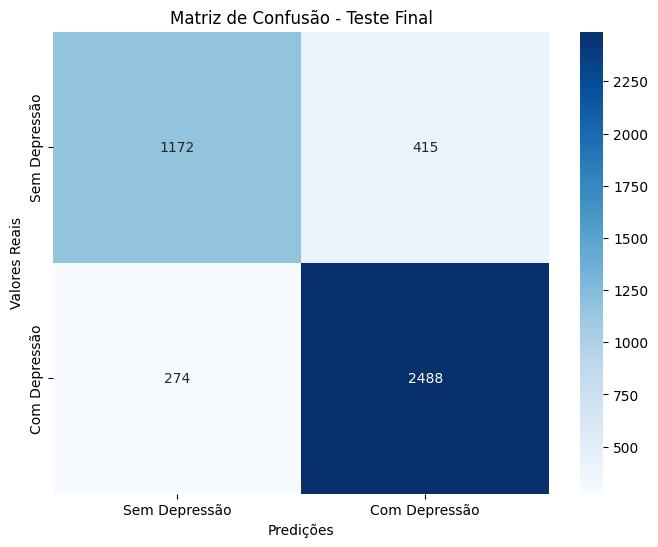

In [28]:
cm = confusion_matrix(y_test, y_test_pred_binary)


# Visualização da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Sem Depressão', 'Com Depressão'],
            yticklabels=['Sem Depressão', 'Com Depressão'])
plt.title('Matriz de Confusão - Teste Final')
plt.ylabel('Valores Reais')
plt.xlabel('Predições')
plt.show()

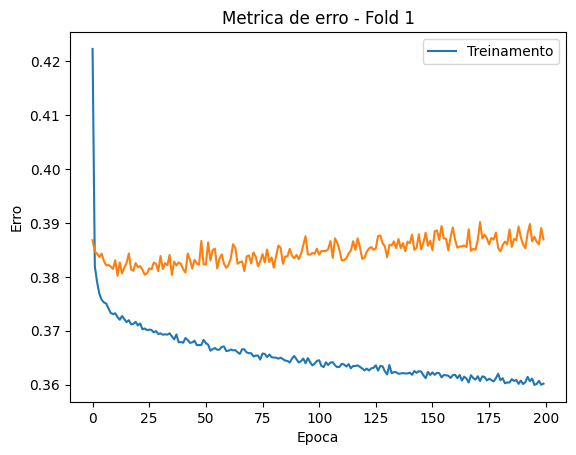

--> Acuracia (treino): 0.8437
--> Acuracia (validacao): 0.8344
--> E_val - E_in = 0.0298
--> acc_in - acc_val = 0.0092



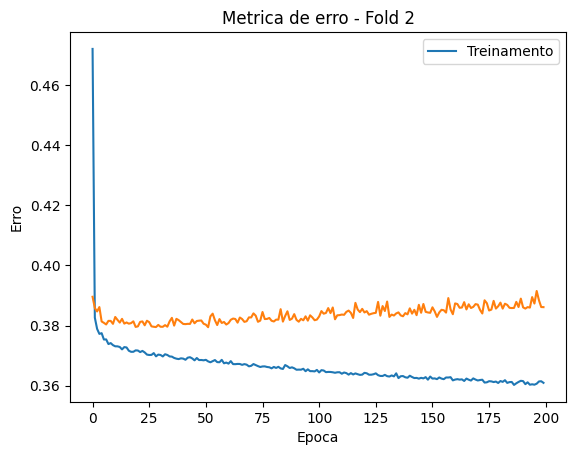

--> Acuracia (treino): 0.8433
--> Acuracia (validacao): 0.8373
--> E_val - E_in = 0.0278
--> acc_in - acc_val = 0.0059



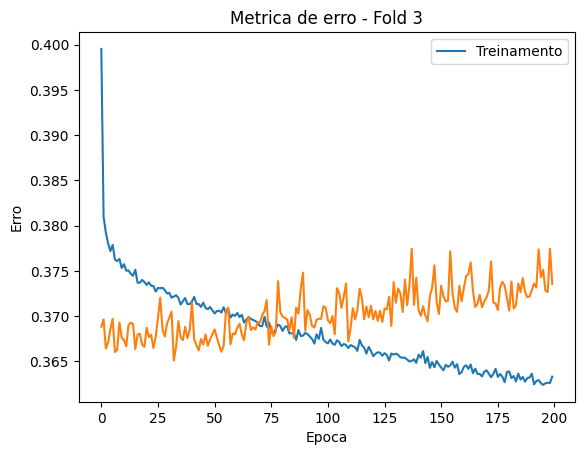

--> Acuracia (treino): 0.8443
--> Acuracia (validacao): 0.8318
--> E_val - E_in = 0.0135
--> acc_in - acc_val = 0.0124



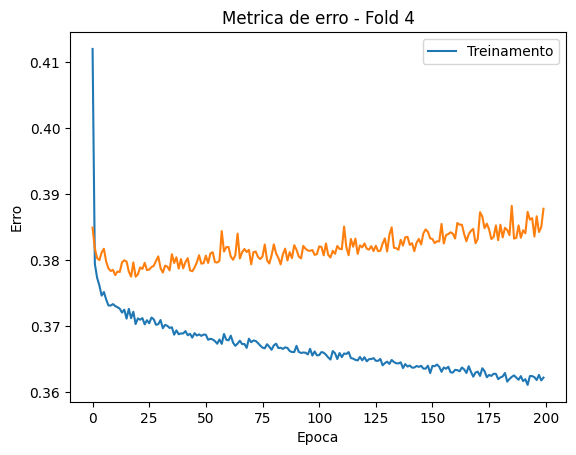

--> Acuracia (treino): 0.8414
--> Acuracia (validacao): 0.8272
--> E_val - E_in = 0.0255
--> acc_in - acc_val = 0.0142



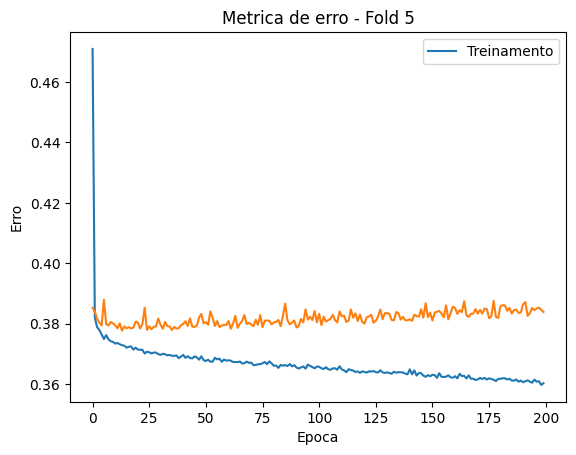

--> Acuracia (treino): 0.8436
--> Acuracia (validacao): 0.8338
--> E_val - E_in = 0.0259
--> acc_in - acc_val = 0.0097



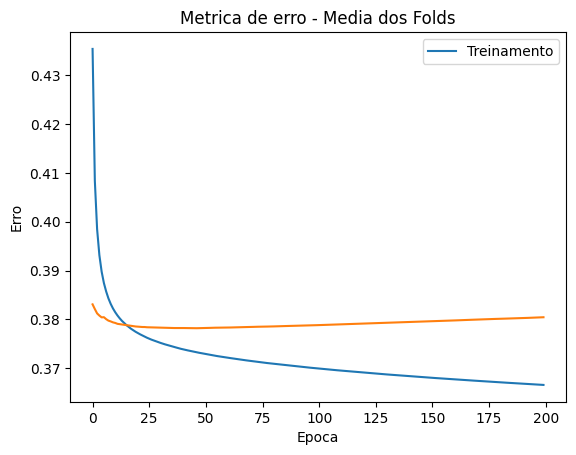

--> Acuracia (treino): 0.8432
--> Acuracia (validacao): 0.8329
--> E_in = 0.3592
--> E_val = 0.3837
--> E_val - E_in = 0.0245
--> acc_in - acc_val = 0.0103



In [31]:
from sklearn.model_selection import StratifiedKFold

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)


# Garante o balanceamento nos folds
skf = StratifiedKFold(n_splits=5, shuffle=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = X_train_scaled
X_test = X_test_scaled

accuracies_train = []
accuracies_val = []
history_list = []
ein_list = []
eval_list = []

# Realiza o k-fold cross validation
i = 0
for train_index, val_index in skf.split(X_train, y_train):
    i = i + 1
    
    # CORREÇÃO: Usar .iloc para indexação posicional
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Criando a arquitetura da rede neural    
    model = Sequential()

    model.add(Input(shape=(10,)))

    model.add(Dense(60, kernel_initializer='he_normal', activation='relu'))
    model.add(Dense(30,  kernel_initializer='he_normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='glorot_normal', activation='sigmoid'))
    
    # Compilar o modelo
    model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
  
    # Treina o modelo
    history = model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), epochs=200, batch_size=BATCH_SIZE, verbose=0)
    
    history_list.append(history) 
    
    # Avalia o modelo
    E_in, accuracy_train = model.evaluate(X_train_fold, y_train_fold, batch_size=BATCH_SIZE, verbose=0)
    E_val, accuracy_val = model.evaluate(X_val_fold, y_val_fold, batch_size=BATCH_SIZE, verbose=0)
    
    accuracies_train.append(accuracy_train)
    accuracies_val.append(accuracy_val)
    ein_list.append(E_in)
    eval_list.append(E_val)    
    
    # Exibe o historico de treinamento para um fold especifico
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Metrica de erro - Fold {i}')
    plt.ylabel('Erro')
    plt.xlabel('Epoca')
    plt.legend(['Treinamento'])
    plt.show()

    print(f'--> Acuracia (treino): {accuracy_train:.4f}')
    print(f'--> Acuracia (validacao): {accuracy_val:.4f}')
    print(f"--> E_val - E_in = {E_val - E_in:.4f}")
    print(f"--> acc_in - acc_val = {accuracy_train - accuracy_val:.4f}\n")    

# Calcula a acuracia media
avg_accuracy_train = np.mean(accuracies_train)
avg_accuracy_val = np.mean(accuracies_val)
avg_ein = np.mean(ein_list)
avg_eval = np.mean(eval_list)

# Historico com valores medios dos folds
history_loss_avg = []
history_val_loss_avg = []
aux_list1 = []
aux_list2 = []

for i in range(len(history.history['loss'])):
    for j in range(len(history_list)):
        aux_list1.append(history_list[j].history['loss'][i])
        aux_list2.append(history_list[j].history['val_loss'][i])
    history_loss_avg.append(np.mean(aux_list1))
    history_val_loss_avg.append(np.mean(aux_list2))                            
                   
plt.plot(history_loss_avg)
plt.plot(history_val_loss_avg)
plt.title('Metrica de erro - Media dos Folds')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

print(f'--> Acuracia (treino): {avg_accuracy_train:.4f}')
print(f'--> Acuracia (validacao): {avg_accuracy_val:.4f}')
print(f"--> E_in = {avg_ein:.4f}")
print(f"--> E_val = {avg_eval:.4f}")
print(f"--> E_val - E_in = {avg_eval - avg_ein:.4f}")
print(f"--> acc_in - acc_val = {avg_accuracy_train - avg_accuracy_val:.4f}\n")    

In [32]:
# AVALIAÇÃO FINAL NO CONJUNTO DE TESTE (após o k-fold)
# Fazendo predições no conjunto de teste
y_test_pred_proba = model.predict(X_test)
y_test_pred_binary = (y_test_pred_proba > 0.5).astype(int).flatten()

# Avaliação final do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test, 
                                         batch_size=BATCH_SIZE, verbose=0)

print("\n=== RESULTADO FINAL DA REDE NEURAL ===")
print(f"   Acurácia no conjunto de TESTE: {test_accuracy:.4f}")
print(f"   Loss no conjunto de teste: {test_loss:.4f}")

# Calculando métricas detalhadas
test_precision = precision_score(y_test, y_test_pred_binary)
test_recall = recall_score(y_test, y_test_pred_binary)
test_f1 = f1_score(y_test, y_test_pred_binary)

print(f"   Precisão: {test_precision:.4f}")
print(f"   Recall: {test_recall:.4f}") 
print(f"   F1-Score: {test_f1:.4f}")

print("\n=== RELATÓRIO DETALHADO DE CLASSIFICAÇÃO ===")
print(classification_report(y_test, y_test_pred_binary, 
                          target_names=['Sem Depressão', 'Com Depressão']))

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

=== RESULTADO FINAL DA REDE NEURAL ===
   Acurácia no conjunto de TESTE: 0.8381
   Loss no conjunto de teste: 0.3782
   Precisão: 0.8663
   Recall: 0.8831
   F1-Score: 0.8746

=== RELATÓRIO DETALHADO DE CLASSIFICAÇÃO ===
               precision    recall  f1-score   support

Sem Depressão       0.79      0.76      0.77      1568
Com Depressão       0.87      0.88      0.87      2781

     accuracy                           0.84      4349
    macro avg       0.83      0.82      0.82      4349
 weighted avg       0.84      0.84      0.84      4349



In [33]:
# Obtendo a acuracia no conjunto de teste
E_out, acc_test = model.evaluate(X_test, y_test, verbose=0)

print(f"--> E_out = {E_out:.4f}")
print(f'--> Acuracia (teste): {acc_test:.4f}')

--> E_out = 0.3782
--> Acuracia (teste): 0.8381


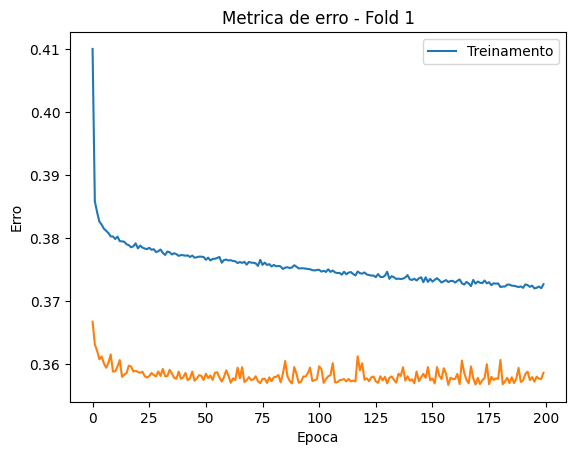

--> Acuracia (treino): 0.8381
--> Acuracia (validacao): 0.8433
--> E_val - E_in = -0.0131
--> acc_in - acc_val = -0.0053



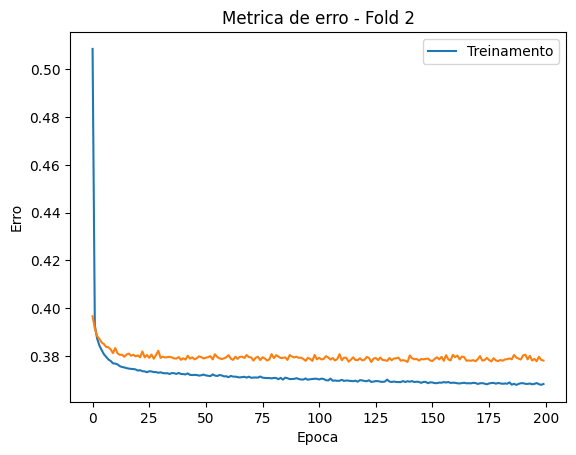

--> Acuracia (treino): 0.8373
--> Acuracia (validacao): 0.8393
--> E_val - E_in = 0.0102
--> acc_in - acc_val = -0.0020



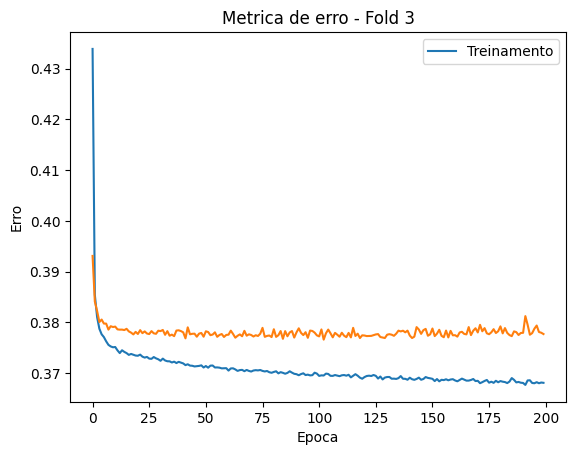

--> Acuracia (treino): 0.8402
--> Acuracia (validacao): 0.8327
--> E_val - E_in = 0.0104
--> acc_in - acc_val = 0.0075



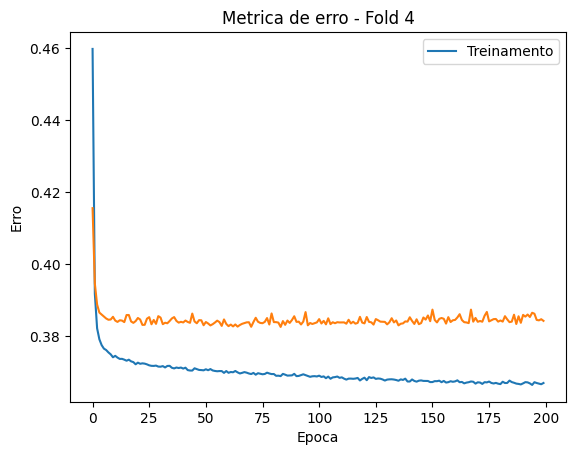

--> Acuracia (treino): 0.8399
--> Acuracia (validacao): 0.8289
--> E_val - E_in = 0.0186
--> acc_in - acc_val = 0.0110



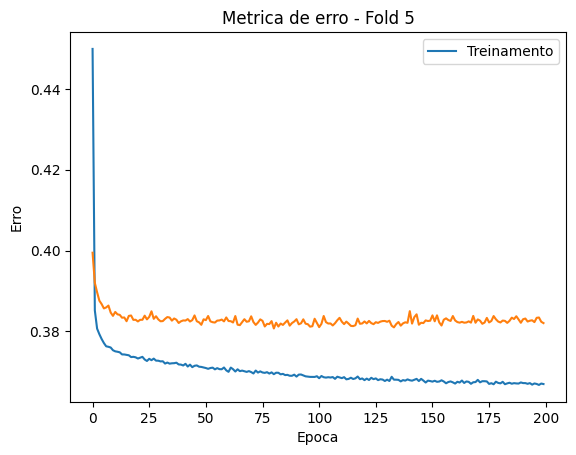

--> Acuracia (treino): 0.8402
--> Acuracia (validacao): 0.8364
--> E_val - E_in = 0.0164
--> acc_in - acc_val = 0.0038



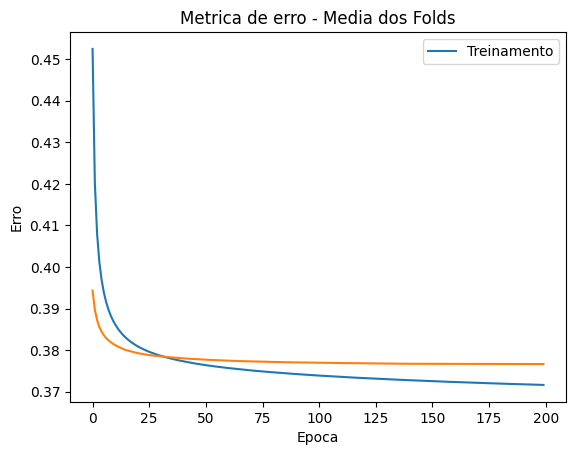

--> Acuracia (treino): 0.8391
--> Acuracia (validacao): 0.8361
--> E_in = 0.3676
--> E_val = 0.3762
--> E_val - E_in = 0.0085
--> acc_in - acc_val = 0.0030



In [37]:
from sklearn.model_selection import StratifiedKFold

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)

# Garante o balanceamento nos folds
skf = StratifiedKFold(n_splits=5, shuffle=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = X_train_scaled
X_test = X_test_scaled

accuracies_train = []
accuracies_val = []
history_list = []
ein_list = []
eval_list = []

# Realiza o k-fold cross validation
i = 0
for train_index, val_index in skf.split(X_train, y_train):
    i = i + 1
    
    # CORREÇÃO: Usar .iloc para indexação posicional
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Criando a arquitetura da rede neural    
    model = Sequential()

    model.add(Input(shape=(10,)))

    model.add(Dense(60, kernel_initializer='he_normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='glorot_normal', activation='sigmoid'))
    
    # Compilar o modelo
    model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
  
    # Treina o modelo
    history = model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), epochs=200, batch_size=BATCH_SIZE, verbose=0)
    
    history_list.append(history) 
    
    # Avalia o modelo
    E_in, accuracy_train = model.evaluate(X_train_fold, y_train_fold, batch_size=BATCH_SIZE, verbose=0)
    E_val, accuracy_val = model.evaluate(X_val_fold, y_val_fold, batch_size=BATCH_SIZE, verbose=0)
    
    accuracies_train.append(accuracy_train)
    accuracies_val.append(accuracy_val)
    ein_list.append(E_in)
    eval_list.append(E_val)    
    
    # Exibe o historico de treinamento para um fold especifico
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Metrica de erro - Fold {i}')
    plt.ylabel('Erro')
    plt.xlabel('Epoca')
    plt.legend(['Treinamento'])
    plt.show()

    print(f'--> Acuracia (treino): {accuracy_train:.4f}')
    print(f'--> Acuracia (validacao): {accuracy_val:.4f}')
    print(f"--> E_val - E_in = {E_val - E_in:.4f}")
    print(f"--> acc_in - acc_val = {accuracy_train - accuracy_val:.4f}\n")    

# Calcula a acuracia media
avg_accuracy_train = np.mean(accuracies_train)
avg_accuracy_val = np.mean(accuracies_val)
avg_ein = np.mean(ein_list)
avg_eval = np.mean(eval_list)

# Historico com valores medios dos folds
history_loss_avg = []
history_val_loss_avg = []
aux_list1 = []
aux_list2 = []

for i in range(len(history.history['loss'])):
    for j in range(len(history_list)):
        aux_list1.append(history_list[j].history['loss'][i])
        aux_list2.append(history_list[j].history['val_loss'][i])
    history_loss_avg.append(np.mean(aux_list1))
    history_val_loss_avg.append(np.mean(aux_list2))                            
                   
plt.plot(history_loss_avg)
plt.plot(history_val_loss_avg)
plt.title('Metrica de erro - Media dos Folds')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

print(f'--> Acuracia (treino): {avg_accuracy_train:.4f}')
print(f'--> Acuracia (validacao): {avg_accuracy_val:.4f}')
print(f"--> E_in = {avg_ein:.4f}")
print(f"--> E_val = {avg_eval:.4f}")
print(f"--> E_val - E_in = {avg_eval - avg_ein:.4f}")
print(f"--> acc_in - acc_val = {avg_accuracy_train - avg_accuracy_val:.4f}\n")    

In [ ]:
# Obtendo a acuracia no conjunto de teste
E_out, acc_test = model.evaluate(X_test, y_test, verbose=0)

print(f"--> E_out = {E_out:.4f}")
print(f'--> Acuracia (teste): {acc_test:.4f}')


--> E_out = 0.3750
--> Acuracia (teste): 0.8393


In [ ]:
y_test_pred_proba = model.predict(X_test)
y_test_pred_binary = (y_test_pred_proba > 0.5).astype(int).flatten()

# Avaliação final do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test, 
                                         batch_size=BATCH_SIZE, verbose=0)

print("\n=== RESULTADO FINAL DA REDE NEURAL ===")
print(f"   Acurácia no conjunto de TESTE: {test_accuracy:.4f}")
print(f"   Loss no conjunto de teste: {test_loss:.4f}")

# Calculando métricas detalhadas
test_precision = precision_score(y_test, y_test_pred_binary)
test_recall = recall_score(y_test, y_test_pred_binary)
test_f1 = f1_score(y_test, y_test_pred_binary)

print(f"   Precisão: {test_precision:.4f}")
print(f"   Recall: {test_recall:.4f}") 
print(f"   F1-Score: {test_f1:.4f}")

print("\n=== RELATÓRIO DETALHADO DE CLASSIFICAÇÃO ===")
print(classification_report(y_test, y_test_pred_binary, 
                          target_names=['Sem Depressão', 'Com Depressão']))

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step

=== RESULTADO FINAL DA REDE NEURAL ===
   Acurácia no conjunto de TESTE: 0.8393
   Loss no conjunto de teste: 0.3750
   Precisão: 0.8663
   Recall: 0.8853
   F1-Score: 0.8757

=== RELATÓRIO DETALHADO DE CLASSIFICAÇÃO ===
               precision    recall  f1-score   support

Sem Depressão       0.79      0.76      0.77      1568
Com Depressão       0.87      0.89      0.88      2781

     accuracy                           0.84      4349
    macro avg       0.83      0.82      0.82      4349
 weighted avg       0.84      0.84      0.84      4349

